# Sign Language Detection - An Image Classification Project

### About
The data set is a collection of images of alphabets from the American Sign Language, separated in 29 folders which represent the various classes.

### Content
The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING. These 3 classes are very helpful in real-time applications, and classification. The test data set contains a mere 28 images, to encourage the use of real-world test images.

### Acknowledgements
- How to use Kaggle Datasets in Google Colab - https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a
- Reference ipynb notebook - https://colab.research.google.com/drive/1c-U-fCmpcI0TAIds4_9IatzxMkcYnY8d#scrollTo=xfPP3dVf3KUg

## Importing important libraries and project creation.

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
project_name='sign-detection'

## Retrieving sign language dataset from Kaggle datasets.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip \*.zip  && rm *.zip

Archive:  asl-alphabet.zip
replace asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/B_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/C_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/D_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/E_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/F_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/G_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/H_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_test/asl_alphabet_test/I_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
n
replace asl_alphabet_test/asl_alphabet_test/J_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace asl_a

In [8]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [9]:
cd ..

/content/gdrive/My Drive


In [10]:
cd ..

/content/gdrive


In [11]:
cd ..

/content


In [12]:
cd ..

/


The above section is only to be used when the dataset is being retrived for the first time.

## Preparing ASL Sign Language Dataset

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
data_dir = '/content/gdrive/MyDrive/Kaggle'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/asl_alphabet_train/asl_alphabet_train")
print(classes)

['kaggle.json', 'asl_alphabet_test', 'asl_alphabet_train', 'flowers', 'asl-alphabet.zip']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [15]:
data_tfms = tt.Compose([tt.Resize((64,64)),tt.CenterCrop((64,64)),tt.ToTensor()])

In [16]:
data_ds = ImageFolder(data_dir+'/asl_alphabet_train/asl_alphabet_train', data_tfms)
len(data_ds)

87000

In [17]:
train_ds, valid_ds = torch.utils.data.random_split(data_ds, [78300,8700])

Above I have not used the already present asl_alphabet_test folder since it has very less data for it to qualify being a proper validity check. I have thus randomly distributed the train data(new_train_data = 90%,new_test_data=10%) itself because it is very large.

In [18]:
img, label = train_ds[2500]
print(img.shape, label)

torch.Size([3, 64, 64]) 27


Label:  J (9)


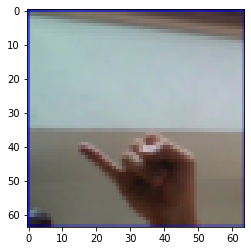

In [19]:
def show_example(img,label):
  print('Label: ', classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1, 2, 0))
  
show_example(*train_ds[31419])

In [20]:
batch_size = 256

In [21]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [22]:
from torchvision.utils import make_grid
def show_batch(dl):
    for img, label in dl:
        fig, ax = plt.subplots(figsize=(16, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img, nrow = 16).permute(1,2,0))
        break

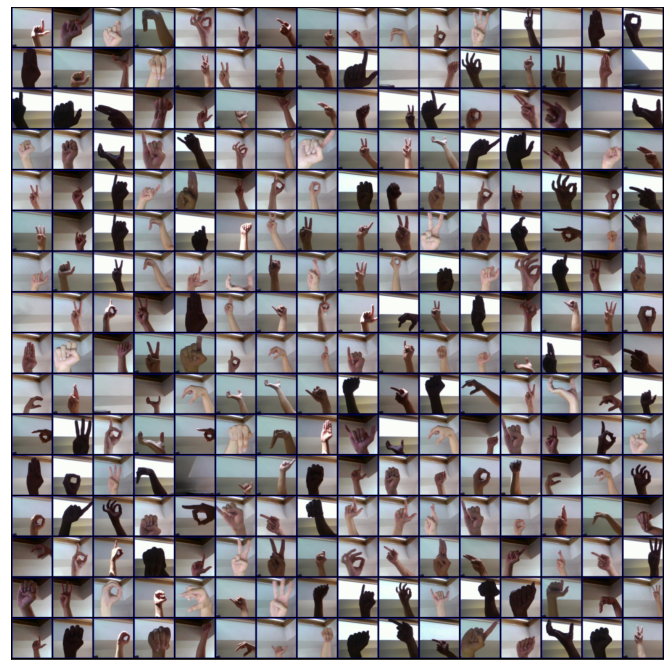

In [23]:
show_batch(train_dl)

## Using GPU

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
device = get_default_device()
device

device(type='cuda')

In [26]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Modelling

In [27]:
import torch.nn as nn
import torch.nn.functional as F

In [28]:
sample_model = nn.Sequential(
    nn.Conv2d(3, 29, kernel_size=3, padding=1),
    nn.MaxPool2d(64, 64)
)

In [29]:
if torch.cuda.is_available():
    sample_model.cuda()

In [30]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = sample_model(images)
    print("out shape", out.shape)
    break

images shape:  torch.Size([256, 3, 64, 64])
out shape torch.Size([256, 29, 1, 1])


In [31]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
  

In [32]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2,2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)        #128 x 64 x 64
        self.conv2 = conv_block(128, 256, pool=True)     #256 x 32 x 32
        self.conv3 = conv_block(256, 512, pool=True)      #512 x 16 x 16
        self.conv4 = conv_block(512, 512, pool=True)      #512 x 8 x 8
        self.conv5 = conv_block(512, 512, pool=True)      #512 x 4 x 4
        self.classifier = nn.Sequential(nn.MaxPool2d(4,4), # 512 x 1 x 1
                                        nn.Flatten(),     #512
                                        nn.Dropout(0.2),  #512
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.classifier(out)
        return out

In [33]:
model = to_device(ResNet9(3, 29), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=T

## Training the Model

In [34]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [35]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.033911459147930145, 'val_loss': 3.368100881576538}]

In [37]:
epochs = 5
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [38]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.4292, val_loss: 0.3805, val_acc: 0.8840
Epoch [1], train_loss: 0.0865, val_loss: 0.0582, val_acc: 0.9814
Epoch [2], train_loss: 0.0292, val_loss: 0.0008, val_acc: 0.9999
Epoch [3], train_loss: 0.0035, val_loss: 0.0001, val_acc: 1.0000
Epoch [4], train_loss: 0.0003, val_loss: 0.0001, val_acc: 1.0000
CPU times: user 5min 43s, sys: 5min 27s, total: 11min 10s
Wall time: 1h 14min 41s


In [40]:
train_time='1:14:41'

In [41]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

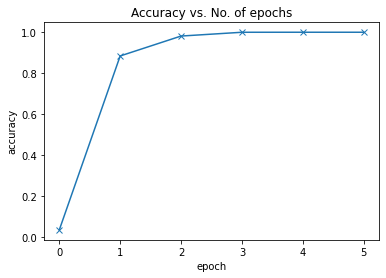

In [42]:
plot_accuracies(history)

In [43]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

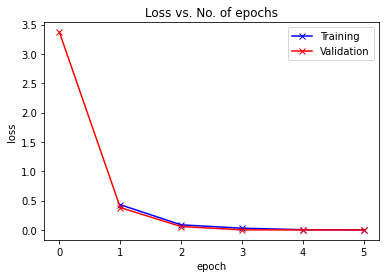

In [44]:
plot_losses(history)

## Testing with individual images

In [48]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

Label: 1 , Predicted: 1


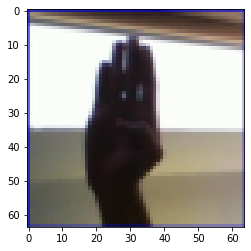

In [49]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


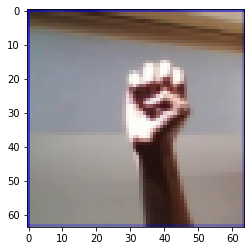

In [51]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', label, ', Predicted:', predict_image(img, model))

## Save and Commit

In [52]:
torch.save(model.state_dict(), 'asl-resnet9.pth')

## Conclusion and Further Work
- The model can now read American Sign Language.
- It can further be used to read other sign languages.
- Various security reasons and medical purposes may require the use of this.
- This was my first attempt at a fully working project and I plan on expanding my knowledge in the field of image segmentation and obejct detection.


In [53]:
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('10bJ4PCoP-Bf25qDP6E_fUx09nD-3KX3J')

     |████████████████████████████████| 71kB 5.5MB/s 


In [54]:
!pip install jovian --upgrade --quiet

In [55]:
jovian.commit(project=project_name, environment=None, outputs=['asl-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/2019ucs0097/sign-detection


'https://jovian.ai/2019ucs0097/sign-detection'

In [56]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [57]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [58]:
jovian.commit(project=project_name, environment=None, outputs=['asl-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/2019ucs0097/sign-detection


'https://jovian.ai/2019ucs0097/sign-detection'

In [59]:
jovian.commit(project=project_name, environment=None, outputs=['asl-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/2019ucs0097/sign-detection


'https://jovian.ai/2019ucs0097/sign-detection'